## Import Libraries

In [13]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where, mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

## Generate Imbalanced Dataset

Counter({0: 19900, 1: 100})


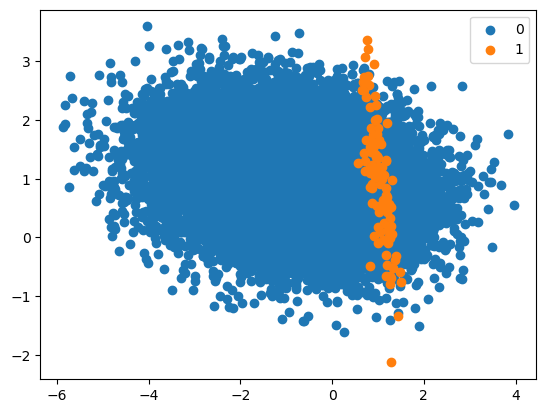

In [20]:
# Question: Generate 20,000 binary data points, with 99.5% belonging to one class
X, y = make_classification(
    n_samples=20000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.995],
    flip_y=0,
    random_state=2
)

# Show the class distributions
counter = Counter(y)
print(counter)

# Question: Plot the dataset
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

pyplot.legend()
pyplot.show()

## Fit Logistic Regression

In [22]:
# Create a logistic regression model
model = LogisticRegression(solver='lbfgs')

# Setup the 10-fold cross validation, with 9 folds for training and the remaining for testing
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Question: Repeatedly fit and evaluate the model using the AUC score
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.934


## Fit Class-Weighted Logistic Regression

In [37]:
# Question: Try out different class weights to improve on the normal logistic regression
weights = {0:0.995, 1:0.995}
model = LogisticRegression(solver="lbfgs", class_weight=weights)

# Setup the 10-fold cross validation, with 9 folds for training and the remaining for testing
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Repeatedly fit and evaluate the model using the AUC score
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.934
